In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from scipy.signal import stft
plt.ioff()

In [2]:
from numpy import pi, exp, cos, sin, linspace, arange

In [12]:
def play_stft( N= 200, T = 3, f = 100, window_size = 20, boundary_method='zeros', std_deviation=1):

# Signal definition
    x= linspace(0, T, N)
    sig = exp(1j * 2*pi*f*x)

#STFT
    freq, time, Zxx = stft(sig, window=sp.windows.gaussian(window_size, std_deviation), nperseg=window_size)

# spectrogram
    spec = np.abs(Zxx)**2

#Plot
    fig, ax = plt.subplots(figsize=(12,7))
    ax.imshow(spec, aspect='auto')
    plt.show()
    return freq, time, Zxx, spec

## Modifying the standard deviation

/usr/lib/python3/dist-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


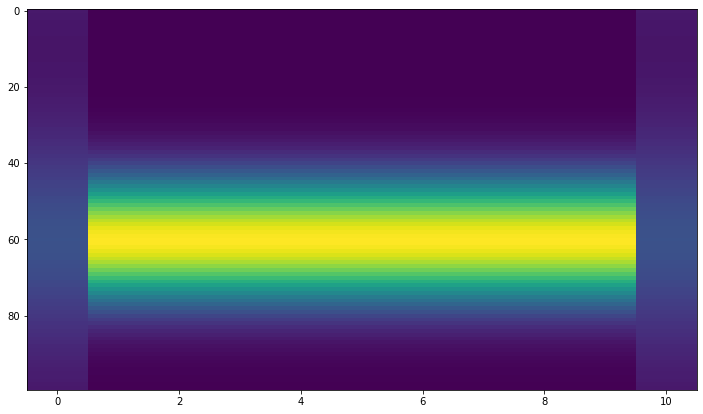

In [4]:
play_stft( N= 500, T = 3, f = 100, window_size=100);

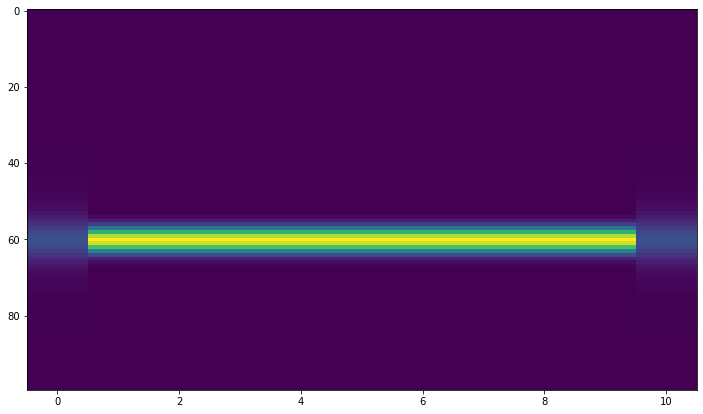

In [5]:
play_stft( N= 500, T = 3, f = 100, window_size=100, std_deviation=5);

A higher std deviation (narrower peaks) will result in narrower beams

### Changing the window sampling rate

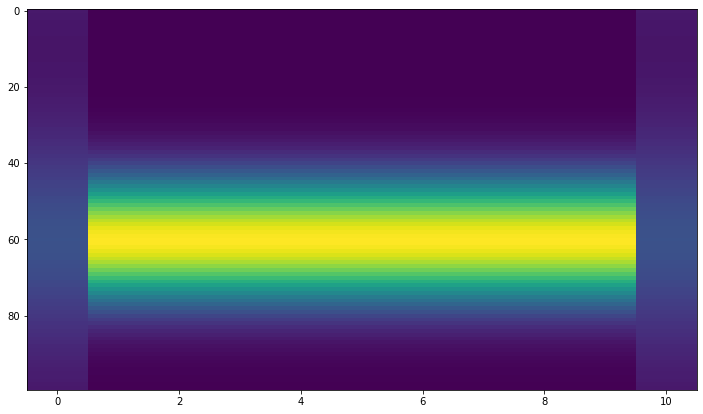

In [7]:
play_stft( N= 500, T = 3, f = 100, window_size=100);

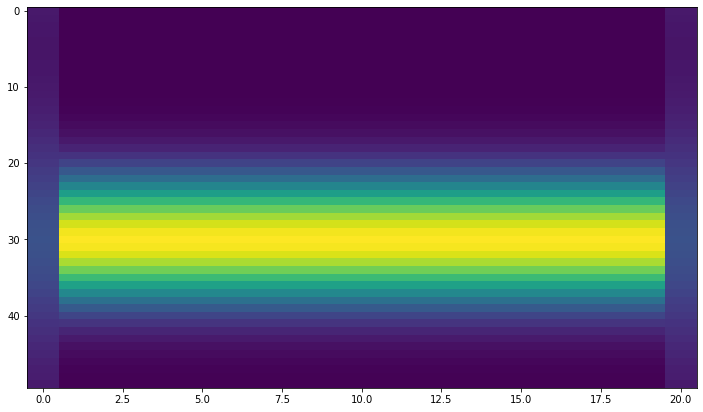

In [8]:
play_stft( N= 500, T = 3, f = 100, window_size=50);


A lower sampling of the window will result in less frequency bins

In [11]:
play_stft(N= 500, T = 3, f = 100, window_size=100, nperseg=150);

ValueError: value specified for nperseg is different from length of window

## Getting the same plot as in 1 or 2 ridges

In [50]:
def spectrogram_2_ridges( N= 200, T = 3, f1 = 100, f2=130, window_sampling = 20, boundary_method='zeros', std_deviation=1):

# Signal definition
    x= linspace(0, T, N)
    sig1 = exp(1j * 2*pi*f1*x)
    sig2 = exp(1j * 2*pi*f2*x)

#STFT
    freq, time, Zxx = stft(sig1+sig2, window=sp.windows.gaussian(window_sampling, std_deviation, sym=False), nperseg=window_sampling)

# spectrogram
    spec = np.abs(Zxx)**2

#Plot
    fig, ax = plt.subplots(figsize=(12,7))
    ax.imshow(spec, aspect='auto')
    plt.show()
    return freq, time, Zxx, spec

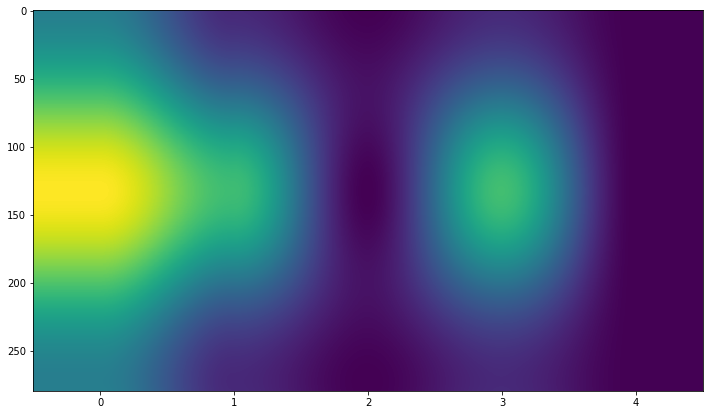

In [106]:
spectrogram_2_ridges(window_sampling=280, std_deviation=.6, f1=230, f2=260, N=500, boundary_method='periodic', T=3);

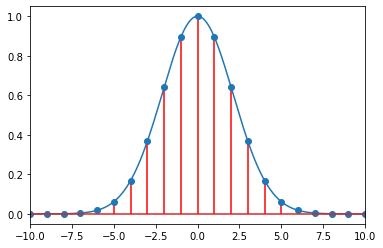

In [86]:
gauss = lambda s, x : np.exp(-(x/s)**2)
N = 111
s=3
t = np.arange(0, N, dtype=float) - N//2
# test function for plotting
x = np.linspace(-N/2,N/2, N*1000)
plt.plot(x, gauss(s, x))
plt.stem(t, gauss(s,t), linefmt='r')
plt.xlim(-10,10)
#plt.vlines(t,0, 1, 'r')
plt.show()

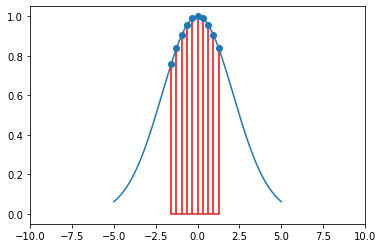

In [96]:
N = 10
s=3
t = (np.arange(0, N, dtype=float) - N//2) /(np.sqrt(N))
# test function for plotting
x = np.linspace(-N/2,N/2, N*1000)
plt.plot(x, gauss(s, x))
plt.stem(t, gauss(s,t), linefmt='r')
plt.xlim(-10,10)
#plt.vlines(t,0, 1, 'r')
plt.show()